In [1]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from patchify import patchify
from PIL import Image
import segmentation_models as sm
from tensorflow.keras.metrics import MeanIoU
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [2]:
os.chdir("D:\\Dataset")

In [3]:
os.getcwd()

'D:\\Dataset'

In [4]:
root_dir=("D:\\Dataset")

In [5]:
for path, subdir, files in os.walk(root_dir):
    print(path)

D:\Dataset
D:\Dataset\images
D:\Dataset\labels
D:\Dataset\labels_1D
D:\Dataset\patched_320_images
D:\Dataset\patched_320_mask


In [6]:
img_dir=root_dir+"images/"

In [7]:
patch_size=320

In [8]:
output_dir = "D:\\Dataset\\patched_320_images"  # Specify the directory where you want to save the images

In [9]:
image_dataset = []
for path, subdirs, files in os.walk(root_dir):
    #print(path)
    dirname = path.split(os.path.sep)[-1]
    if dirname == 'images':   #Find all 'images' directories
        images = os.listdir(path)  #List of all image names in this subdirectory
        for i, image_name in enumerate(images):
            if image_name.endswith(".jpg"):   #Only read jpg images...

                image = cv2.imread(path+"/"+image_name, 1)  #Read each image as BGR
                SIZE_X = (image.shape[1]//patch_size)*patch_size #Nearest size divisible by our patch size
                SIZE_Y = (image.shape[0]//patch_size)*patch_size #Nearest size divisible by our patch size
                image = Image.fromarray(image)
                image = image.crop((0 ,0, SIZE_X, SIZE_Y))  #Crop from top left corner
                #image = image.resize((SIZE_X, SIZE_Y))  #Try not to resize for semantic segmentation
                image = np.array(image)

                #Extract patches from each image
                print("Now patchifying image:", path+"/"+image_name)
                patches_img = patchify(image, (patch_size, patch_size, 3), step=patch_size)  #Step=320 for 320 patches means no overlap

                for i in range(patches_img.shape[0]):
                    for j in range(patches_img.shape[1]):

                        single_patch_img = patches_img[i,j,:,:]

                        #Use minmaxscaler.
                        single_patch_img = scaler.fit_transform(single_patch_img.reshape(-1, single_patch_img.shape[-1])).reshape(single_patch_img.shape)

                        #single_patch_img = (single_patch_img.astype('float32')) / 255.
                        single_patch_img = single_patch_img[0] #Drop the extra unecessary dimension that patchify adds.
                        image_dataset.append(single_patch_img)
                        # Save the image
#                         output_path = os.path.join(output_dir, f"{image_name}_patch_{i}_{j}.jpg")
#                         cv2.imwrite(output_path, single_patch_img)
#                         image_dataset.append(single_patch_img)

Now patchifying image: D:\Dataset\images/img_0001.jpg
Now patchifying image: D:\Dataset\images/img_0002.jpg
Now patchifying image: D:\Dataset\images/img_0003.jpg
Now patchifying image: D:\Dataset\images/img_0004.jpg
Now patchifying image: D:\Dataset\images/img_0005.jpg
Now patchifying image: D:\Dataset\images/img_0006.jpg
Now patchifying image: D:\Dataset\images/img_0007.jpg
Now patchifying image: D:\Dataset\images/img_0008.jpg
Now patchifying image: D:\Dataset\images/img_0009.jpg
Now patchifying image: D:\Dataset\images/img_0010.jpg
Now patchifying image: D:\Dataset\images/img_0011.jpg
Now patchifying image: D:\Dataset\images/img_0012.jpg
Now patchifying image: D:\Dataset\images/img_0013.jpg
Now patchifying image: D:\Dataset\images/img_0014.jpg
Now patchifying image: D:\Dataset\images/img_0015.jpg
Now patchifying image: D:\Dataset\images/img_0016.jpg
Now patchifying image: D:\Dataset\images/img_0017.jpg
Now patchifying image: D:\Dataset\images/img_0018.jpg
Now patchifying image: D:\Da

In [10]:
#Now do the same as above for masks
mask_dataset = []
output_directory="D:\\Dataset\\patched_320_mask"
for path, subdirs, files in os.walk(root_dir):
    #print(path)
    dirname = path.split(os.path.sep)[-1]
    if dirname == 'labels':   #Find all 'labels' directories
        masks = os.listdir(path)  #List of all image names in this subdirectory
        for i, mask_name in enumerate(masks):
            if mask_name.endswith(".png"):   #Only read png images... (masks in this dataset)

                mask = cv2.imread(path+"/"+mask_name, 1)  #Read each image as Grey (or color but remember to map each color to an integer)
                mask = cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
                SIZE_X = (mask.shape[1]//patch_size)*patch_size #Nearest size divisible by our patch size
                SIZE_Y = (mask.shape[0]//patch_size)*patch_size #Nearest size divisible by our patch size
                mask = Image.fromarray(mask)
                mask = mask.crop((0 ,0, SIZE_X, SIZE_Y))  #Crop from top left corner
                #mask = mask.resize((SIZE_X, SIZE_Y))  #Try not to resize for semantic segmentation
                mask = np.array(mask)

                #Extract patches from each image
                print("Now patchifying mask:", path+"/"+mask_name)
                patches_mask = patchify(mask, (patch_size, patch_size, 3), step=patch_size)  #Step=256 for 256 patches means no overlap

                for i in range(patches_mask.shape[0]):
                    for j in range(patches_mask.shape[1]):

                        single_patch_mask = patches_mask[i,j,:,:]
                        #single_patch_img = (single_patch_img.astype('float32')) / 255. #No need to scale masks, but you can do it if you want
                        single_patch_mask = single_patch_mask[0] #Drop the extra unecessary dimension that patchify adds.
                        mask_dataset.append(single_patch_mask)
                         # Save the mask
#                         output_path = os.path.join(output_directory, f"{mask_name}_patch_{i}_{j}.png")
#                         cv2.imwrite(output_path, single_patch_mask)
#                         mask_dataset.append(single_patch_mask)

Now patchifying mask: D:\Dataset\labels/img_0001.png
Now patchifying mask: D:\Dataset\labels/img_0002.png
Now patchifying mask: D:\Dataset\labels/img_0003.png
Now patchifying mask: D:\Dataset\labels/img_0004.png
Now patchifying mask: D:\Dataset\labels/img_0005.png
Now patchifying mask: D:\Dataset\labels/img_0006.png
Now patchifying mask: D:\Dataset\labels/img_0007.png
Now patchifying mask: D:\Dataset\labels/img_0008.png
Now patchifying mask: D:\Dataset\labels/img_0009.png
Now patchifying mask: D:\Dataset\labels/img_0010.png
Now patchifying mask: D:\Dataset\labels/img_0011.png
Now patchifying mask: D:\Dataset\labels/img_0012.png
Now patchifying mask: D:\Dataset\labels/img_0013.png
Now patchifying mask: D:\Dataset\labels/img_0014.png
Now patchifying mask: D:\Dataset\labels/img_0015.png
Now patchifying mask: D:\Dataset\labels/img_0016.png
Now patchifying mask: D:\Dataset\labels/img_0017.png
Now patchifying mask: D:\Dataset\labels/img_0018.png
Now patchifying mask: D:\Dataset\labels/img_00

In [11]:
image_dataset = np.array(image_dataset)
mask_dataset =  np.array(mask_dataset)

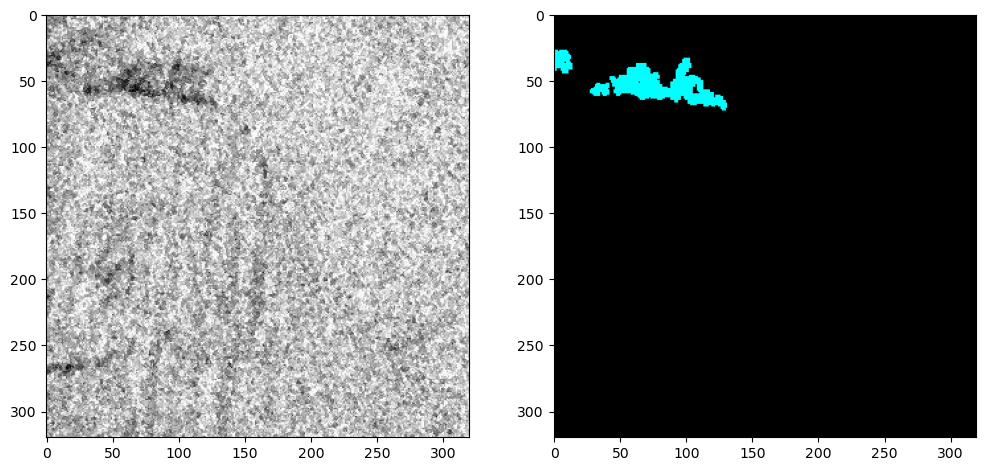

In [12]:
#alingment check, view few mages
import random
import numpy as np
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.imshow(np.reshape(image_dataset[image_number], (patch_size, patch_size, 3)))
plt.subplot(122)
plt.imshow(np.reshape(mask_dataset[image_number], (patch_size, patch_size, 3)))
plt.show()


In [13]:
print(mask_dataset.shape)

(6672, 320, 320, 3)


In [14]:
##RGB MASKs converting into labels
black=[0,0,0]
sea_surface=np.array(black)

cyan=[0,255,255]
oil_spill=np.array(cyan)

red=[255,0,0]
look_alike=np.array(red)

brown=[153,76,0]
ship=np.array(brown)

green=[0,153,0]
land=np.array(green)

labels= single_patch_mask

# Now replace RGB to integer values to be used as labels.
#Find pixels with combination of RGB for the above defined arrays...
#if matches then replace all values in that pixel with a specific integer
def rgb_to_2D_label(label):
    """
    Suply our labale masks as input in RGB format. 
    Replace pixels with specific class ID ...
    """
    label_seg = np.zeros(label.shape,dtype=np.uint8)
    label_seg [np.all(label==sea_surface,axis=-1)] = 0
    label_seg [np.all(label==oil_spill,axis=-1)] = 1
    label_seg [np.all(label==look_alike,axis=-1)] = 2
    label_seg [np.all(label==ship,axis=-1)] = 3
    label_seg [np.all(label==land,axis=-1)] = 4
 
    label_seg = label_seg[:,:,0]  #Just take the first channel, no need for all 3 channels
    
    return label_seg

labels = []
for i in range(mask_dataset.shape[0]):
    label = rgb_to_2D_label(mask_dataset[i])
    labels.append(label)    

labels = np.array(labels)   
labels = np.expand_dims(labels, axis=3)

print("Unique labels in label dataset are: ", np.unique(labels))

Unique labels in label dataset are:  [0 1 2 3 4]


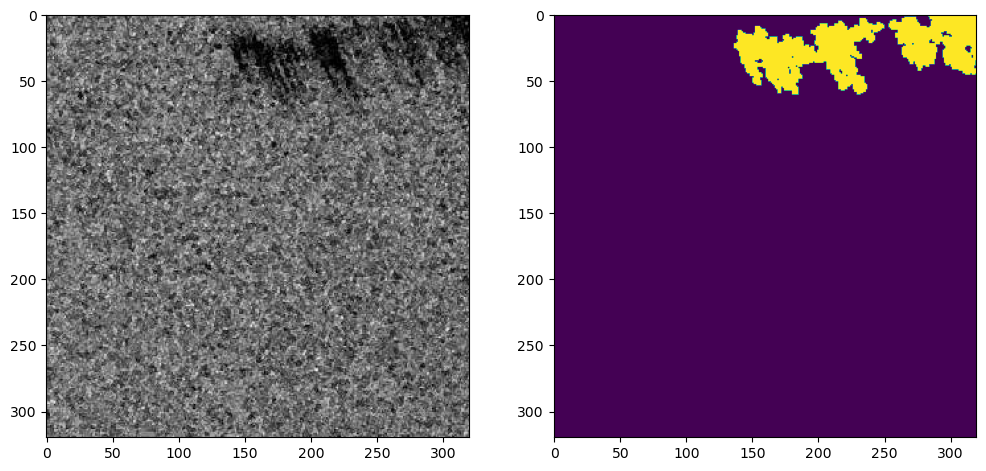

In [15]:
#Another check, view few mages
import random
import numpy as np
image_number = random.randint(0, len(image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(image_dataset[image_number])
plt.subplot(122)
plt.imshow(labels[image_number][:,:,0])
plt.show()

In [16]:

# Define a function to check if a patch has 100% sea surface
def has_100_percent_sea_surface(label_patch):
    return np.all(label_patch == 0)

# Initialize lists to store the filtered data
filtered_image_dataset = []
filtered_mask_dataset = []
filtered_labels = []

for i in range(len(image_dataset)):
    # Check if the label patch has 100% sea surface
    if not has_100_percent_sea_surface(labels[i]):
        filtered_image_dataset.append(image_dataset[i])
        filtered_mask_dataset.append(mask_dataset[i])
        filtered_labels.append(labels[i])

# Convert the filtered data lists to NumPy arrays
filtered_image_dataset = np.array(filtered_image_dataset)
filtered_mask_dataset = np.array(filtered_mask_dataset)
filtered_labels = np.array(filtered_labels)

# Print the number of remaining patches
print("Number of remaining patches:", len(filtered_image_dataset))


Number of remaining patches: 4053


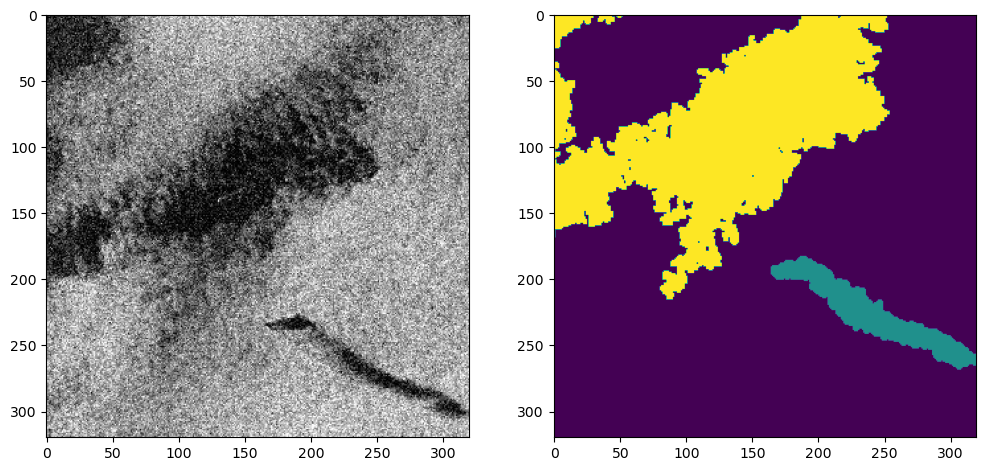

In [30]:
#Another check, view few mages
import random
import numpy as np
image_number = random.randint(0, len(filtered_image_dataset))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(filtered_image_dataset[image_number])
plt.subplot(122)
plt.imshow(filtered_labels[image_number][:,:,0])
plt.show()

In [33]:
n_classes = len(np.unique(filtered_labels))
from keras.utils import to_categorical
filtered_labels_cat = to_categorical(filtered_labels, num_classes=n_classes)

In [34]:
from sklearn.model_selection import train_test_split

# Split the data into training (60%) and the rest (40%)
X_train, X_rest, y_train, y_rest = train_test_split(filtered_image_dataset, filtered_labels_cat, test_size=0.4, random_state=42)

# Split the remaining data into cross-validation (50%) and testing (50%)
X_cv, X_test, y_cv, y_test = train_test_split(X_rest, y_rest, test_size=0.5, random_state=42)

MemoryError: Unable to allocate 1.55 GiB for an array with shape (811, 320, 320, 5) and data type float32